In [ ]:
import ffn 
from empyrical import alpha_beta
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd

In [11]:
%matplotlib inline

In [12]:
plt.style.use('/home/luuk/Documents/MNRAS_stylesheet')

In [13]:
fname = 'PortfoliosFinal.xlsx'
df_values   = pd.read_excel(fname,sheet_name='PortfolioValues').set_index('Date')
df_returns   = pd.read_excel(fname,sheet_name='PortfolioReturns').set_index('Date')
df_performance   = pd.read_excel(fname,sheet_name='PortfolioPerformance')

In [37]:
mean_group = df_values.mean(axis=1)
market = df_values['Benchmark']

In [ ]:
excess_ret = (df_returns[49] - df_returns['Benchmark'])*100
ret = df_returns[49]*100
market_ret = df_returns['Benchmark']*100

In [302]:
df_values[49].values[-1] - market[-1]

3089989.5263660103

In [140]:
(df_values[49].values[-1]/1e8)**(52/5)

1.56596865961022

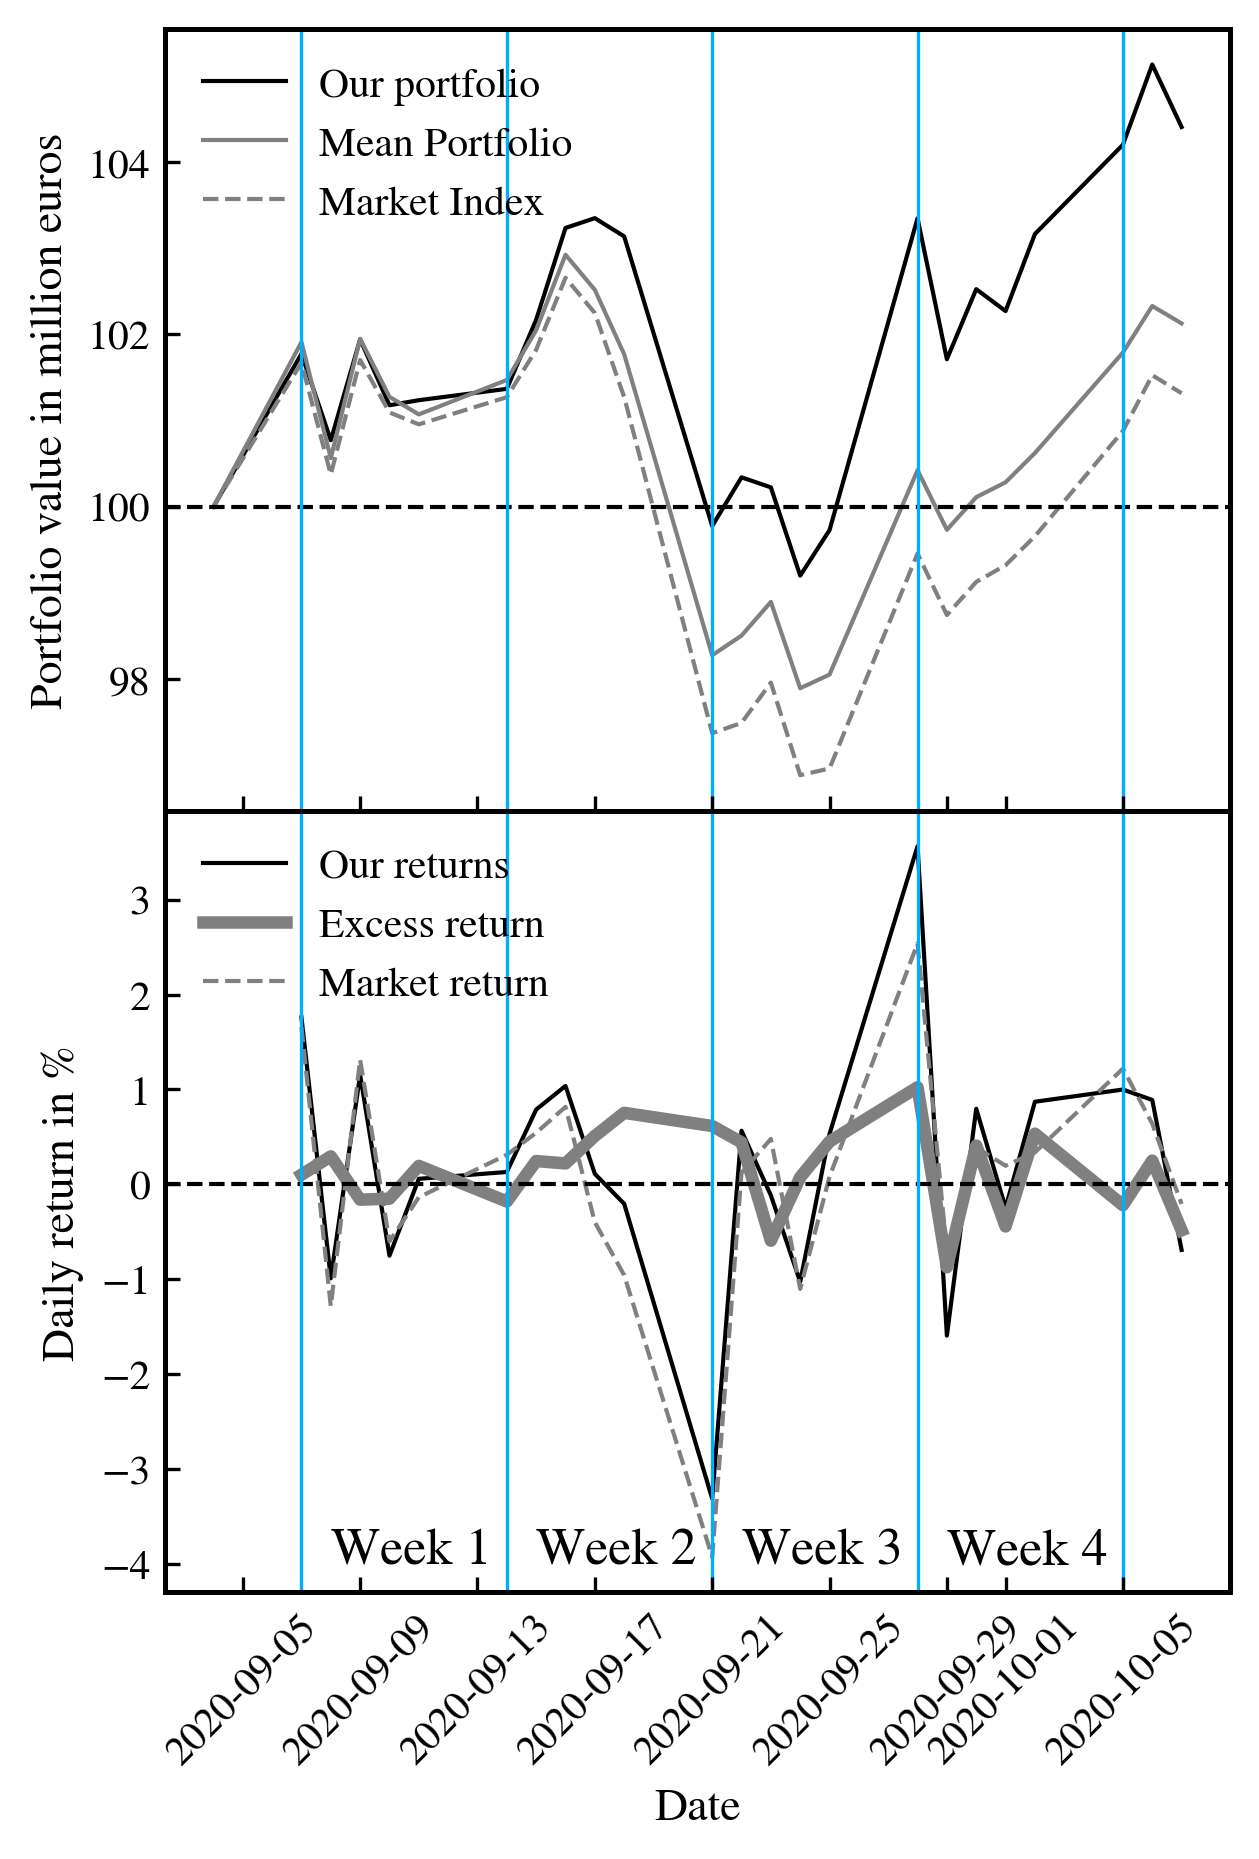

In [321]:
plt.figure(figsize=(4,6))
plt.subplot(211)
plt.plot(df_values[49].index.values,df_values[49].values/1e6, label='Our portfolio',color='black', lw=1)
plt.plot(mean_group.index.values,mean_group.values/1e6, label='Mean Portfolio', color='grey', lw=1)
plt.plot(market.index.values,market.values/1e6, label='Market Index', color='grey',ls='--', lw=1)
plt.ylabel('Portfolio value in million euros', size=11)
plt.axhline(100,ls='--',color='black',lw=1)
plt.yticks(size=10)
lim = plt.xlim()
for i in [1,6,11,16,21]:
    plt.axvline(ret.index[i],lw=0.8)


    
plt.legend(loc='upper left', fontsize=10)
plt.xticks(plt.xticks()[0], labels = len(plt.xticks()[0])*[''])
plt.subplot(212)
plt.plot(ret.index, ret.values,color='black', label='Our returns', lw=1)
plt.plot(excess_ret.index, excess_ret.values, color='grey', lw=3, label='Excess return')
plt.plot(market_ret.index, market_ret.values, color='grey',ls='--', lw=1, label='Market return')
plt.xticks(rotation=45, size=10)
plt.yticks(size=10)
plt.annotate('Week 1',xy=(ret.index[2],-4),size=12.5)
plt.annotate('Week 2',xy=(ret.index[7],-4),size=12.5)
plt.annotate('Week 3',xy=(ret.index[12],-4),size=12.5)
plt.annotate('Week 4',xy=(ret.index[17],-4),size=12.5)
plt.axhline(0,ls='--',color='black',lw=1)
plt.ylabel('Daily return in %', size=11)
plt.xlabel('Date', size=11)
plt.legend(loc='upper left', fontsize=10)

plt.tight_layout(pad=0.)
plt.xlim(lim)
plt.xticks(plt.xticks()[0])
for i in [1,6,11,16,21]:
    plt.axvline(ret.index[i],lw=0.8)
plt.savefig('Performance.pdf')
plt.show()

In [197]:
avg_ret = df_performance.iloc[1,1:]*100
risk_adj = df_performance.iloc[4,1:]*100

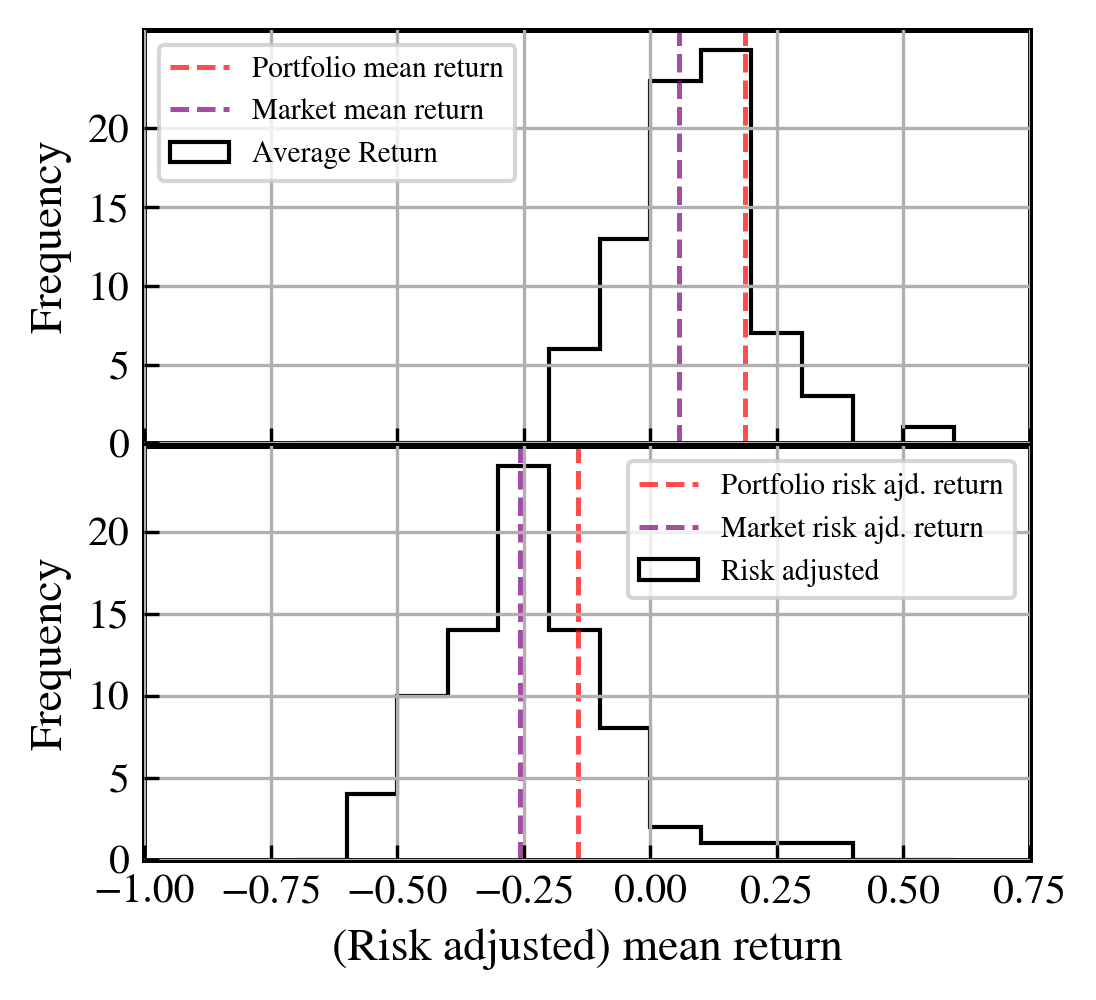

In [326]:
bins=np.arange(-0.7,0.7,0.1)
plt.subplot(211)
avg_ret.hist(bins=bins,histtype='step',lw=1.,label='Average Return',color='black')
plt.axvline(avg_ret.loc[49],color='red',label='Portfolio mean return',alpha=0.7,ls='--',lw=1.2)
xticklocations = plt.xticks()[0]
xticks = plt.xticks(plt.xticks()[0], labels = len(plt.xticks()[0])*[''])#, size=10)
plt.axvline(avg_ret['Benchmark'],color='purple',label='Market mean return',alpha=0.7,ls='--',lw=1.2)
xlim=plt.xlim()
plt.yticks(size=10)
plt.ylabel('Frequency', size=11)
plt.legend(loc='upper left',frameon=True,fontsize=7)
plt.yticks(np.arange(0,21,5))


plt.subplot(212)
risk_adj.hist(bins=bins,histtype='step',lw=1.,label='Risk adjusted',color='black')
plt.axvline(risk_adj.loc[49],color='red',label='Portfolio risk ajd. return',alpha=0.7,ls='--',lw=1.2)
plt.axvline(risk_adj['Benchmark'],color='purple',label='Market risk ajd. return',alpha=0.7,ls='--',lw=1.2)
plt.xlabel('(Risk adjusted) mean return', size=11)
plt.title('')
plt.xlim(xlim)
plt.xticks(xticklocations,size=10)
plt.ylabel('Frequency', size=11)
plt.yticks(np.arange(0,21,5))
plt.yticks(size=10)
plt.tight_layout(pad=-0.6)
plt.legend(loc='upper right',frameon=True,fontsize=7)
plt.savefig('riskadj_ret.pdf', bbox_inches='tight')

In [271]:
print(market_ret.std())
print(ret.std())

1.2555084164020578
1.323672229305292


In [305]:
avg_ret.sort_values().loc[49]

0.18750191653346657

In [307]:
risk_adj.loc[49]

-0.14341614079285642

In [313]:
df_values[[49,'Benchmark']].to_excel('OurvsBenchmark.xlsx')